Jesli masz dane wejsciowe bez obliczonego bmi, wpisz 1, jesli masz obliczone bmi, wpisz cokolwiek innego


<Axes: xlabel='bmi', ylabel='count'>

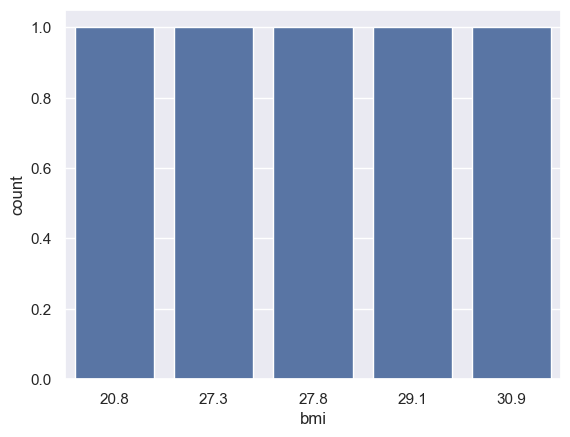

In [24]:
import seaborn as sns
import pandas as pd
print("Jesli masz dane wejsciowe bez obliczonego bmi, wpisz 1, jesli masz obliczone bmi, wpisz cokolwiek innego")
# zrobic by user mogl wybrac sciezkę do pliku i brac tamten plik
a=input()
if a==1:
    # Load the data from the text file
    df = pd.read_csv('dane.txt', sep=',')  # Assuming columns are separated by commas

    # Calculate the BMI
    df['bmi'] = df['waga'] / ((df['wzrost']/100) ** 2)

    # Save the updated DataFrame to a new file
    df.to_csv('data_with_bmi.txt', index=False)
else:
    df = pd.read_csv('data_with_bmi.txt', sep=',')
# Step 2: Round BMI values to group similar entries
df['bmi_rounded'] = df['bmi'].round(1)  # Round BMI to 1 decimal place

# Step 3: Count the frequency of each rounded BMI value
bmi_counts = df['bmi_rounded'].value_counts().reset_index()
bmi_counts.columns = ['bmi', 'count']  # Rename columns for clarity
bmi_counts = bmi_counts.sort_values(by='bmi')  # Sort by BMI for better visualization

# Step 4: Create a bar plot using seaborn
sns.barplot(x='bmi', y='count', data=bmi_counts)

In [1]:
import pandas as pd
import seaborn as sns

# Step 1: Prompt the user for the file path
file_path = input("Wpisz ścieżkę pliku: ")

def try_read_csv(file_path):
    for sep in [',', '\t', ' ']:
        try:
            # Attempt to read the file with the current separator
            return pd.read_csv(file_path, sep=sep)
        except Exception as e:
            continue  # If reading with the current separator fails, try the next one
    # If no valid separator was found, raise an error
    raise ValueError("Plik nie mógł być odczytany przy użyciu najczęstszych separatorów (, ' ' tab")

# Step 2: Load the data
try:
    df = try_read_csv(file_path)
except FileNotFoundError:
    print("Plik nie został znaleziony")
    exit()
except ValueError as e:
    print(f"Error: {e}")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Step 3: Calculate the BMI column if not already present
if 'bmi' not in df.columns:
    try:
        df['bmi'] = df['waga'] / ((df['wzrost']/100) ** 2)
    except KeyError:
        print("The file does not contain the required columns 'wzrost' and 'waga'.")
        exit()

# Step 5: Categorize the BMI values into four groups
bins = [-float('inf'), 18.5, 25, 30, float('inf')]  # Define the bin edges
labels = ['niedowaga', 'optimum', 'nadwaga', 'otylosc']  # Labels for the categories
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)

# Step 6: Create a bar plot using seaborn
sns.barplot(x='bmi_category', y='waga', data=df)
#zrobic zeby bmi byly podzielone na grupy na wykresie w zaleznosci od stopnia itp ze niedowaga itp i zeby pokazywala sie liczba osob z takim bmi

The file does not contain the required columns 'wzrost' and 'waga'.


KeyError: 'bmi'

In [ ]:
# Step 5: Count the frequency of each rounded BMI value
bmi_counts = df['bmi_rounded'].value_counts().reset_index()
bmi_counts.columns = ['bmi', 'count']  # Rename columns for clarity
bmi_counts = bmi_counts.sort_values(by='bmi')  # Sort by BMI for better visualization


<Axes: xlabel='bmi_category', ylabel='waga'>

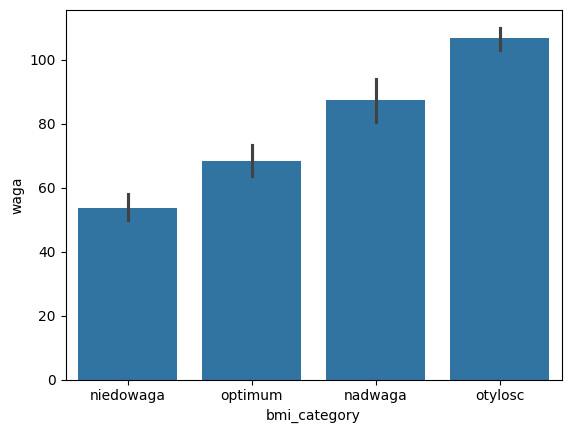

In [1]:
import pandas as pd
import seaborn as sns

# Step 1: Prompt the user for the file path
file_path = input("Wpisz ścieżkę pliku: ")

# Step 2: Load the data
try:
    # Load the data from the specified file
    df = pd.read_csv(file_path, sep='\t')  # Assuming columns are separated by
except FileNotFoundError:
    print("The file was not found. Please check the file path and try again.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()
    # Step 3: Calculate the BMI column if not already present
if 'bmi' not in df.columns:
    try:
        df['bmi'] = df['waga'] / ((df['wzrost']/100) ** 2)
    except KeyError:
        print("The file does not contain the required columns 'wzrost' and 'waga'.")
        exit()

# Step 5: Categorize the BMI values into four groups
bins = [-float('inf'), 18.5, 25, 30, float('inf')]  # Define the bin edges
labels = ['niedowaga', 'optimum', 'nadwaga', 'otylosc']  # Labels for the categories
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)

# Step 6: Create a bar plot using seaborn
sns.barplot(x='bmi_category', y='waga', data=df)
#zrobic zeby bmi byly podzielone na grupy na wykresie w zaleznosci od stopnia itp ze niedowaga itp i zeby pokazywala sie liczba osob z takim bmi